In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import pickle

In [72]:
df = pd.read_csv('D:/projects/customer/Customer-Segmentation/Data/Retail.csv',  encoding="ISO-8859-1")

In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


In [74]:
df.shape

(541909, 8)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [76]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [77]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [78]:
df = df.dropna()
df.shape

(406829, 8)

In [79]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [80]:
df['Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [81]:
df[df['UnitPrice'] < 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



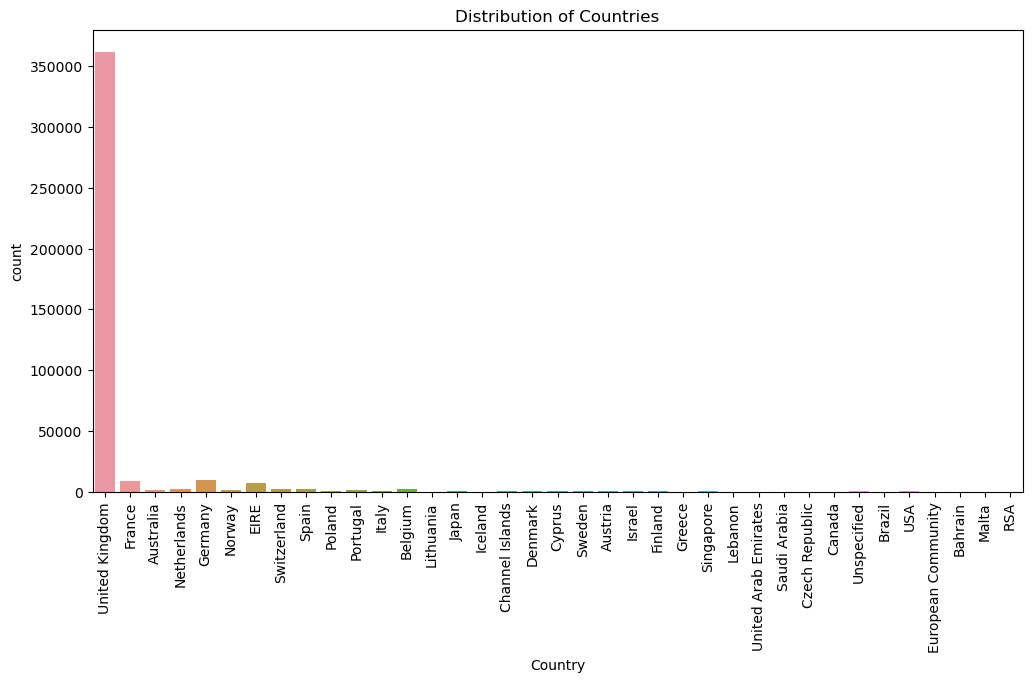

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df)
plt.title('Distribution of Countries')
plt.xticks(rotation=90)
plt.show()

In [83]:
canceled_analysis = df[df['InvoiceNo'].apply(lambda x: 'C' in x)]

In [84]:
df = df[df['InvoiceNo'].apply(lambda x: 'C' not in x)]


In [85]:
df.shape


(397924, 8)

In [86]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H.%M')



In [87]:
print("Number of duplicated transactions:", len(df[df.duplicated()]))


Number of duplicated transactions: 5192


In [88]:
pd.DataFrame(df['UnitPrice'].describe())



,UnitPrice
count,397924.000000
mean,3.116174
std,22.096788
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


In [89]:
df.drop_duplicates(inplace = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [90]:
len(df['Description'].unique().tolist())

3877

In [91]:
pd.DataFrame(df['UnitPrice'].describe())


,UnitPrice
count,392732.000000
mean,3.125596
std,22.240725
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


In [92]:
df[df['UnitPrice']>50]['Description'].unique().tolist()


['RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
 'VINTAGE POST OFFICE CABINET',
 'VINTAGE RED KITCHEN CABINET',
 'REGENCY MIRROR WITH SHUTTERS',
 'LOVE SEAT ANTIQUE WHITE METAL',
 'VINTAGE BLUE KITCHEN CABINET',
 'SCHOOL DESK AND CHAIR ',
 'CHEST NATURAL WOOD 20 DRAWERS',
 'CARRIAGE',
 'DECORATIVE HANGING SHELVING UNIT',
 'Manual',
 'POSTAGE',
 'PICNIC BASKET WICKER 60 PIECES',
 'DOTCOM POSTAGE']

C:\Users\Umang\AppData\Local\Temp\ipykernel_19588\126530908.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



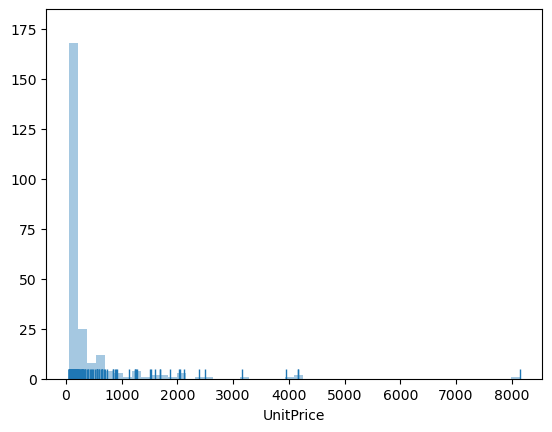

In [93]:
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);


In [94]:
#df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [95]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [96]:
max_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
max_date

Timestamp('2011-12-10 12:50:00')

In [97]:
df['Recency'] = (max_date - df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [98]:
df['Recency'] = df['Recency'].dt.days
df.shape

(392732, 10)

In [99]:
rfm_data = df.groupby('CustomerID').agg({
    'Recency': 'min',
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the RFM data
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [100]:
rfm_data.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,90.512100,2048.215924
std,1721.889758,100.009747,225.515328,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,17.000000,306.455000
50%,15299.000000,51.000000,41.000000,668.560000
75%,16778.500000,142.000000,98.000000,1660.315000
max,18287.000000,374.000000,7676.000000,280206.020000


In [101]:
## Define functions for RFM segmentation
#def rfm_segment(row):
#    if row['Recency'] <= 90 and row['Frequency'] >= 90 and row['Monetary'] >= 2000:
#        return 'High-RF'
#    elif 18 < row['Recency'] <= 140 and 17 <= row['Frequency'] < 100 and 600 <= row['Monetary'] < 2000:
#        return 'Mid-RF'
#    else:
#        return 'Low-RF'
#
## Apply segmentation function to create a new 'RFM_Segment' column
#rfm_data['RFM_Segment'] = rfm_data.apply(rfm_segment, axis=1)
#
## Display the segmented data
#rfm_data.head()
#rfm_data.drop("RFM_Segment", axis='columns', inplace=True)



In [102]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm = rfm_data

In [103]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [104]:
rfm['R_Quartile'] = rfm['Recency'].apply(RClass, args=('Recency',quantiles,))
rfm['F_Quartile'] = rfm['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfm['M_Quartile'] = rfm['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [105]:
rfm['RFMClass'] = rfm.R_Quartile.map(str) \
                            + rfm.F_Quartile.map(str) \
                            + rfm.M_Quartile.map(str)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346.0,326,1,77183.60,4,4,1,441
1,12347.0,2,182,4310.00,1,1,1,111
2,12348.0,75,31,1797.24,3,3,1,331
3,12349.0,19,73,1757.55,2,2,1,221
4,12350.0,310,17,334.40,4,4,3,443
...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444
4335,18281.0,181,7,80.82,4,4,4,444
4336,18282.0,8,12,178.05,1,4,4,144
4337,18283.0,4,721,2045.53,1,1,1,111


In [106]:
print("Top tier: ",len(rfm[rfm['RFMClass']=='111']), "(", round(len(rfm[rfm['RFMClass']=='111'])/len(rfm)*100,2), "%)") 
print('Loyal Customers: ',len(rfm[rfm['F_Quartile']==1]), "(", round(len(rfm[rfm['F_Quartile']==1])/len(rfm)*100,2), "%)")
print("high Spenders: ",len(rfm[rfm['M_Quartile']==1]), "(", round(len(rfm[rfm['M_Quartile']==1])/len(rfm)*100,2), "%)")
print('Inactive But Potentially Returning: ', len(rfm[rfm['RFMClass']=='322']), "(", round(len(rfm[rfm['RFMClass']=='322'])/len(rfm)*100,2), "%)")
print('Inactive and Unlikely to Return: ',len(rfm[rfm['RFMClass']=='444']), "(", round(len(rfm[rfm['RFMClass']=='444'])/len(rfm)*100,2), "%)")


Top tier:  450 ( 10.37 %)
Loyal Customers:  1080 ( 24.89 %)
high Spenders:  1085 ( 25.01 %)
Inactive But Potentially Returning:  168 ( 3.87 %)
Inactive and Unlikely to Return:  381 ( 8.78 %)


In [107]:
def rfm_segment(row):
    if row['RFMClass'] == '111':
        return 'Top Tier'
    elif row['F_Quartile'] == 1:
        return 'Loyal Customers'
    elif row['M_Quartile'] == 1:
        return 'High Spenders'
    elif row['RFMClass'] == '322':
        return 'Inactive But Potentially Returning'
    elif row['RFMClass'] == '444':
        return 'Inactive and Unlikely to Return'
    else:
        return 'Other'

# Apply segmentation function to create a new 'RFM_Segment' column
rfm_data['RFM_Segment'] = rfm_data.apply(rfm_segment, axis=1)

# Display the segmented data
rfm_data.head()


,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders
4,12350.0,310,17,334.40,4,4,3,443,Other


In [108]:
# Assuming you've already loaded the data and dropped canceled transactions
# If not, you can add that part to the code

# Group by 'CustomerID' and aggregate product information
behavioral_data = df.groupby('CustomerID').agg({
    'StockCode': 'nunique',  # Number of unique products purchased
    'Description': lambda x: x.value_counts().idxmax()  # Most frequently purchased product
}).reset_index()

# Rename columns
behavioral_data.columns = ['CustomerID', 'UniqueProducts', 'MostFrequentProduct']

# Merge the behavioral data with the RFM data
segmentation_data = pd.merge(rfm_data, behavioral_data, on='CustomerID', how='left')

# Display the segmentation data
segmentation_data.head()


,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment,UniqueProducts,MostFrequentProduct
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders,1,MEDIUM CERAMIC TOP STORAGE JAR
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier,103,AIRLINE BAG VINTAGE JET SET BROWN
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders,22,POSTAGE
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders,73,PARISIENNE CURIO CABINET
4,12350.0,310,17,334.40,4,4,3,443,Other,17,CHOCOLATE THIS WAY METAL SIGN


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



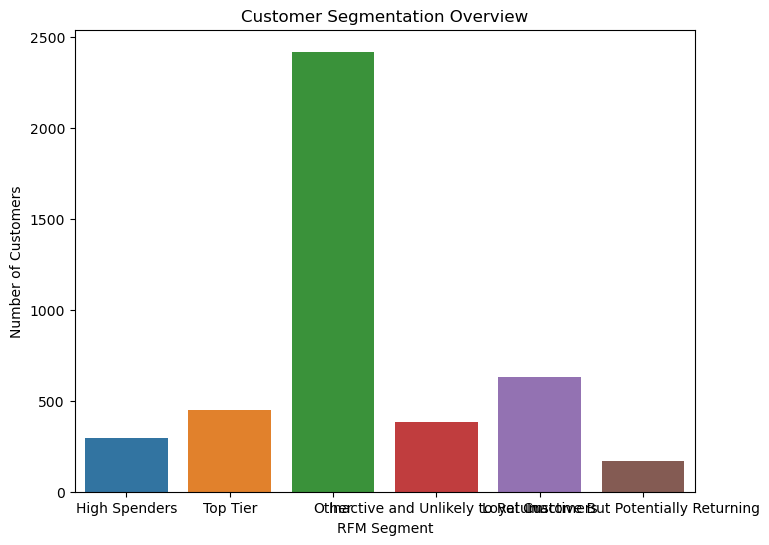

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RFM_Segment', data=segmentation_data)
plt.title('Customer Segmentation Overview')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()

In [111]:
cluster_stats = segmentation_data.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("Cluster Characteristics:")
print(cluster_stats)

Cluster Characteristics:
                          RFM_Segment     Recency   Frequency     Monetary
0                       High Spenders   58.791809   58.382253  4572.140580
1  Inactive But Potentially Returning   85.654762   61.190476  1070.484762
2     Inactive and Unlikely to Return  260.732283    8.199475   157.415433
3                     Loyal Customers   51.704762  185.760317  2883.361383
4                               Other   97.082333   32.954075   543.066087
5                            Top Tier    7.244444  367.873333  9285.881289


In [112]:
fig = px.scatter(
    segmentation_data,
    x='Recency',
    y='Frequency',
    color='RFM_Segment',
    size='Monetary',
    title='Customer Segmentation - Recency vs Frequency',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary'}
)
fig.show()

In [113]:
sample_profiles = segmentation_data.groupby('RFM_Segment').apply(lambda x: x.sample(1)).reset_index(drop=True)
print("Sample Customer Profiles:")
print(sample_profiles[['CustomerID', 'RFM_Segment', 'Recency', 'Frequency', 'Monetary', 'UniqueProducts', 'MostFrequentProduct']])



Sample Customer Profiles:
   CustomerID                         RFM_Segment  Recency  Frequency  \
0     12704.0                       High Spenders        7         88   
1     13032.0  Inactive But Potentially Returning       52         71   
2     15226.0     Inactive and Unlikely to Return      311          8   
3     16324.0                     Loyal Customers      128        111   
4     12571.0                               Other       40         34   
5     14493.0                            Top Tier        7        120   

   Monetary  UniqueProducts                 MostFrequentProduct  
0   2340.84              64                             POSTAGE  
1   1010.18              55             LUNCH BAG RED RETROSPOT  
2    154.41               8           12 EGG HOUSE PAINTED WOOD  
3    408.59             100  WHITE HANGING HEART T-LIGHT HOLDER  
4    519.61              31       SET/6 RED SPOTTY PAPER PLATES  
5   2383.24              95          ALARM CLOCK BAKELIKE GREEN  


In [114]:

# 5. Product Preferences
top_products = segmentation_data.groupby('RFM_Segment')['MostFrequentProduct'].value_counts().unstack().fillna(0)
print("Top Products for Each Segment:")
print(top_products)



Top Products for Each Segment:
MostFrequentProduct                  50'S CHRISTMAS GIFT BAG LARGE  \
RFM_Segment                                                          
High Spenders                                                  0.0   
Inactive But Potentially Returning                             0.0   
Inactive and Unlikely to Return                                0.0   
Loyal Customers                                                0.0   
Other                                                          1.0   
Top Tier                                                       0.0   

MostFrequentProduct                  OVAL WALL MIRROR DIAMANTE   \
RFM_Segment                                                       
High Spenders                                               0.0   
Inactive But Potentially Returning                          0.0   
Inactive and Unlikely to Return                             0.0   
Loyal Customers                                             0.0   
Other 

In [115]:
#from scipy.stats import zscore

# Calculate Z-Score for each feature
#z_scores = zscore(rfm_data)

# Define a threshold for considering a data point as an outlier (e.g., Z-Score > 3)
#outliers = (np.abs(z_scores) > 3).any(axis=1)

#X = rfm_data[~outliers].reset_index(drop=True)
X= rfm_data
X

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders
4,12350.0,310,17,334.40,4,4,3,443,Other
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444,Inactive and Unlikely to Return
4335,18281.0,181,7,80.82,4,4,4,444,Inactive and Unlikely to Return
4336,18282.0,8,12,178.05,1,4,4,144,Other
4337,18283.0,4,721,2045.53,1,1,1,111,Top Tier


In [116]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(X[['Recency', 'Frequency', 'Monetary']])

# Convert the scaled features back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Display the scaled features
rfm_scaled_df

,Recency,Frequency,Monetary
0,2.334858,-0.396968,8.363977
1,-0.905199,0.405730,0.251779
2,-0.175186,-0.263924,-0.027938
3,-0.735196,-0.077663,-0.032357
4,2.174855,-0.326011,-0.190780
...,...,...,...
4334,1.854850,-0.357055,-0.207901
4335,0.884833,-0.370359,-0.219008
4336,-0.845198,-0.348185,-0.208185
4337,-0.885199,2.796087,-0.000299


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

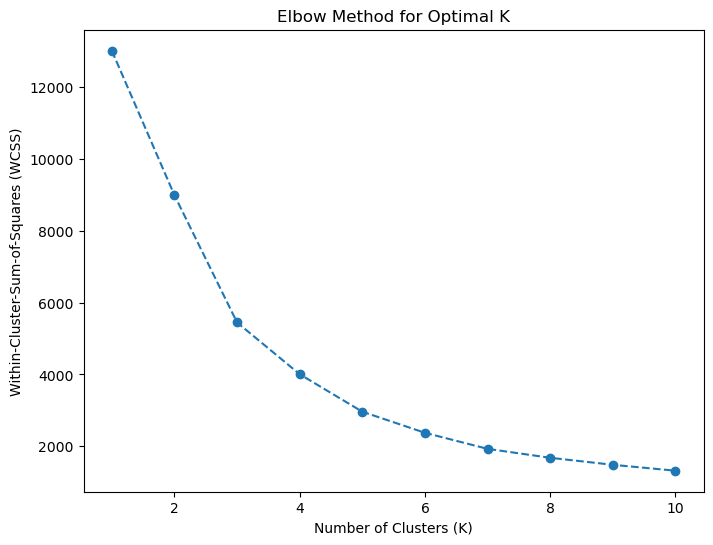

In [117]:
# Use the Elbow Method to find the optimal number of clusters (K)
sse = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



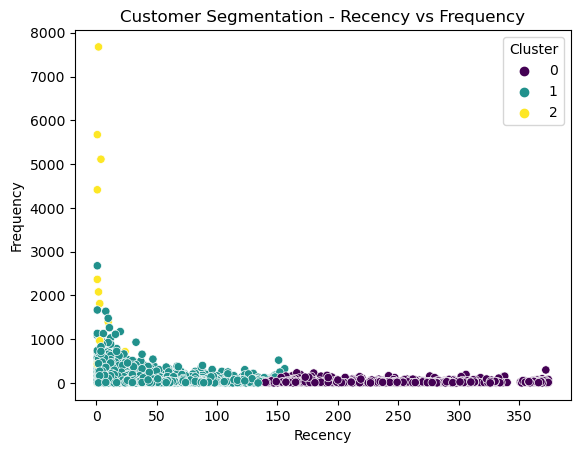

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



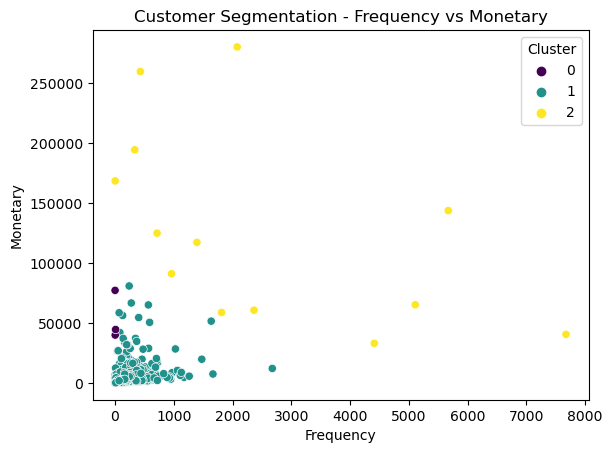

Cluster
0    1080
1    3246
2      13
Name: count, dtype: int64
Silhouette Score: 0.6023126726335443


In [118]:
optimal_k = 3  # Update this based on the visual inspection of the elbow curve

# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualizing the clusters
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=X, palette='viridis')
plt.title('Customer Segmentation - Recency vs Frequency')
plt.show()

sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=X, palette='viridis')
plt.title('Customer Segmentation - Frequency vs Monetary')
plt.show()

# Assessing cluster sizes
cluster_sizes = X['Cluster'].value_counts().sort_index()
print(cluster_sizes)

# Assessing silhouette score for clustering quality
silhouette_avg = silhouette_score(rfm_scaled, X['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

In [119]:
# Save the KMeans model
#with open('model.pkl', 'wb') as model_file:
#    pickle.dump(kmeans, model_file)

# Save the scaler
#with open('scaler.pkl', 'wb') as scaler_file:
#    pickle.dump(scaler, scaler_file)


In [120]:
X[['Recency', 'Frequency', 'Monetary']]

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,182,4310.00
2,75,31,1797.24
3,19,73,1757.55
4,310,17,334.40
...,...,...,...
4334,278,10,180.60
4335,181,7,80.82
4336,8,12,178.05
4337,4,721,2045.53


In [121]:
X

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment,Cluster
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders,0
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier,1
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders,1
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders,1
4,12350.0,310,17,334.40,4,4,3,443,Other,0
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444,Inactive and Unlikely to Return,0
4335,18281.0,181,7,80.82,4,4,4,444,Inactive and Unlikely to Return,0
4336,18282.0,8,12,178.05,1,4,4,144,Other,1
4337,18283.0,4,721,2045.53,1,1,1,111,Top Tier,1


In [122]:
rfm_data = pd.DataFrame(rfm_data)
rfm_data

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment,Cluster
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders,0
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier,1
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders,1
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders,1
4,12350.0,310,17,334.40,4,4,3,443,Other,0
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444,Inactive and Unlikely to Return,0
4335,18281.0,181,7,80.82,4,4,4,444,Inactive and Unlikely to Return,0
4336,18282.0,8,12,178.05,1,4,4,144,Other,1
4337,18283.0,4,721,2045.53,1,1,1,111,Top Tier,1


In [123]:
#rfm_data.to_csv('rfm.csv')


In [124]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment,Cluster
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders,0
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier,1
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders,1
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders,1
4,12350.0,310,17,334.40,4,4,3,443,Other,0
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444,Inactive and Unlikely to Return,0
4335,18281.0,181,7,80.82,4,4,4,444,Inactive and Unlikely to Return,0
4336,18282.0,8,12,178.05,1,4,4,144,Other,1
4337,18283.0,4,721,2045.53,1,1,1,111,Top Tier,1


In [125]:
segmentation_data

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Segment,UniqueProducts,MostFrequentProduct
0,12346.0,326,1,77183.60,4,4,1,441,High Spenders,1,MEDIUM CERAMIC TOP STORAGE JAR
1,12347.0,2,182,4310.00,1,1,1,111,Top Tier,103,AIRLINE BAG VINTAGE JET SET BROWN
2,12348.0,75,31,1797.24,3,3,1,331,High Spenders,22,POSTAGE
3,12349.0,19,73,1757.55,2,2,1,221,High Spenders,73,PARISIENNE CURIO CABINET
4,12350.0,310,17,334.40,4,4,3,443,Other,17,CHOCOLATE THIS WAY METAL SIGN
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,4,4,4,444,Inactive and Unlikely to Return,10,WOOD BLACK BOARD ANT WHITE FINISH
4335,18281.0,181,7,80.82,4,4,4,444,Inactive and Unlikely to Return,7,ROBOT BIRTHDAY CARD
4336,18282.0,8,12,178.05,1,4,4,144,Other,12,ANTIQUE CREAM CUTLERY CUPBOARD
4337,18283.0,4,721,2045.53,1,1,1,111,Top Tier,263,LUNCH BAG WOODLAND


In [126]:
import plotly.express as px
import plotly.graph_objects as go

def time_series_plot(customer_data):
    fig = px.line(customer_data, x='InvoiceDate', y='TotalPrice', title='Time Series Plot of Purchases Over Time')
    return fig

def top_products_chart(customer_data, top_n=5):
    top_products = customer_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n)
    fig = px.bar(x=top_products.index, y=top_products.values, labels={'x': 'Product', 'y': 'Quantity'},
                 title=f'Top {top_n} Products Purchased by the Customer')
    return fig

def purchase_frequency_histogram(customer_data):
    fig = px.histogram(customer_data, x='InvoiceDate', nbins=20, title='Purchase Frequency Distribution')
    return fig

def monetary_value_histogram(customer_data):
    fig = px.histogram(customer_data, x='TotalPrice', nbins=20, title='Monetary Value Distribution')
    return fig

def rfm_radar_chart(ID):
    customer_data = rfm_df[rfm_df['CustomerID'] == id]

    fig = go.Figure()

    # Normalize the RFM values
    normalized_rfm = (customer_data[['Recency', 'Frequency', 'Monetary']] - customer_data[['Recency', 'Frequency', 'Monetary']].min()) / (customer_data[['Recency', 'Frequency', 'Monetary']].max() - customer_data[['Recency', 'Frequency', 'Monetary']].min())

    # Add radar chart traces
    fig.add_trace(go.Scatterpolar(
        r=normalized_rfm.iloc[0].values,
        theta=['Recency', 'Frequency', 'Monetary'],
        fill='toself',
        name='RFM Radar Chart'
    ))

    fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])), title='RFM Radar Chart')
    
    return fig


In [127]:
#fig1 = time_series_plot(customer_data)
#fig2 = top_products_chart(customer_data)
#fig3 = purchase_frequency_histogram(customer_data)
#fig4 = monetary_value_histogram(customer_data)
#fig5 = rfm_radar_chart(rfm_data).show()
#fig1.show()
#fig2.show()
#fig3.show()
#fig4.show()
#fig5.show()

In [128]:
rfm_scaled

array([[ 2.33485829e+00, -3.96968210e-01,  8.36397668e+00],
       [-9.05199314e-01,  4.05730491e-01,  2.51778965e-01],
       [-1.75186336e-01, -2.63924227e-01, -2.79383250e-02],
       ...,
       [-8.45198247e-01, -3.48185416e-01, -2.08184524e-01],
       [-8.85198958e-01,  2.79608740e+00, -2.98993684e-04],
       [-4.95192025e-01, -9.09670479e-02, -2.34811224e-02]])

In [129]:
X[['Recency', 'Frequency', 'Monetary']].to_csv('X.csv')

In [130]:
B = X[['Recency', 'Frequency', 'Monetary']]
arr = [4.0,3.0,10,0]
input_data = pd.DataFrame({'Recency': [arr[0]], 'Frequency': [4.0], 'Monetary': [10.0]})
input_data


,Recency,Frequency,Monetary
0,4.0,4.0,10.0


In [131]:
combined_data = pd.concat([B,input_data], ignore_index=True)
combined_data

,Recency,Frequency,Monetary
0,326.0,1.0,77183.60
1,2.0,182.0,4310.00
2,75.0,31.0,1797.24
3,19.0,73.0,1757.55
4,310.0,17.0,334.40
...,...,...,...
4335,181.0,7.0,80.82
4336,8.0,12.0,178.05
4337,4.0,721.0,2045.53
4338,43.0,70.0,1837.28


In [132]:
#combined_data.columns = [None] * len(combined_data.columns)

combined_data_scaled = scaler.transform(combined_data)

In [133]:
predicted_cluster = kmeans.predict(combined_data_scaled)

In [134]:
        print(f"Predicted cluster: {predicted_cluster}")


Predicted cluster: [0 1 1 ... 1 1 1]
